## Visualizing Filters of a Convolutional Neural Network

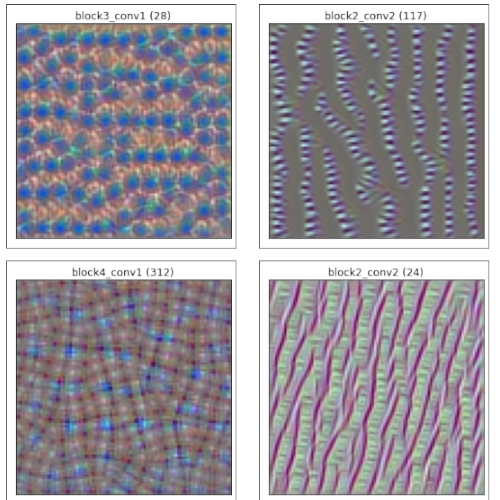

## Task 2: Downloading the Model

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

print('Tensorflow version', tf.__version__)

Tensorflow version 2.6.0


In [2]:
model= tf.keras.applications.vgg16.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (96,96,3)
  
)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

## Task 3: Get Layer Output

In [3]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output
  )

get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## Task 4: Image Visualization

In [4]:
def create_image():
  return tf.random.uniform((96,96,3))
def plot_image(image,title='random'):
  image = image-tf.math.reduce_min(image)
  image = image/tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show

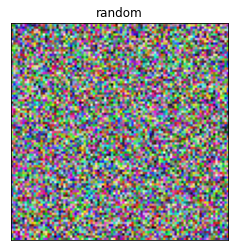

In [5]:
image = create_image()
plot_image(image)

## Task 5: Training Loop

In [6]:
def visualize_filter(layer_name, f_index=None, iters=50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if f_index is None:
    f_index = random.randint(0,num_filters-1)
  assert num_filters>f_index,'f_index out of bounds'

  image = create_image()
  verbose_step = int(iters/10)

  for i in range(0,iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image,axis=0))[:,:,:,f_index]
      loss = tf.math.reduce_mean(out)
    grads = tape.gradient(loss,image)
    grads = tf.math.l2_normalize(grads)
    image+= grads*10

    if(i+1)%verbose_step == 0:
      print(f'Iteration:{i+1}, Lss:{loss.numpy():4f}')
  
  plot_image(image, f'{layer_name}, {f_index}')

## Task 6: Final Results

In [7]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration:50, Lss:234.251633
Iteration:100, Lss:616.367065
Iteration:150, Lss:1042.455811
Iteration:200, Lss:1477.558472
Iteration:250, Lss:1918.455078
Iteration:300, Lss:2362.194336
Iteration:350, Lss:2809.286865
Iteration:400, Lss:3258.774414
Iteration:450, Lss:3709.682373
Iteration:500, Lss:4161.437500


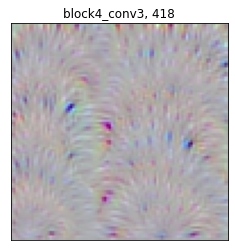

In [11]:
layer_name = 'block4_conv3' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']
visualize_filter(layer_name,iters=500)